In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, PercentFormatter
import seaborn as sns

sns.set_style("whitegrid")

In [4]:
all_transactions = pd.read_parquet('../../../data/transactions_train.parquet')
articles = pd.read_parquet('../../../data/articles.parquet')
customers = pd.read_parquet('../../../data/customers.parquet')

In [5]:
# Get all buying customers
buying_customers = all_transactions['customer_id'].unique()

# Get all missing customers
missing_customers = customers[~customers['customer_id'].isin(buying_customers)]
missing_customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
131,14251714270191885324,-1,-1,0,0,21,168701
297,17321947227894151956,1,1,0,1,22,0
544,18277803548397040010,-1,-1,0,0,28,101
671,8101600972312354768,1,1,0,1,27,6865
809,14191013502397089914,1,1,0,1,41,50713
...,...,...,...,...,...,...,...
1371440,8207655988114203600,-1,-1,0,0,55,104349
1371554,5336180418803415146,1,1,0,1,21,121872
1371739,18129578119391399279,-1,-1,1,0,40,102448
1371872,18013003278538752235,1,1,0,1,21,22475


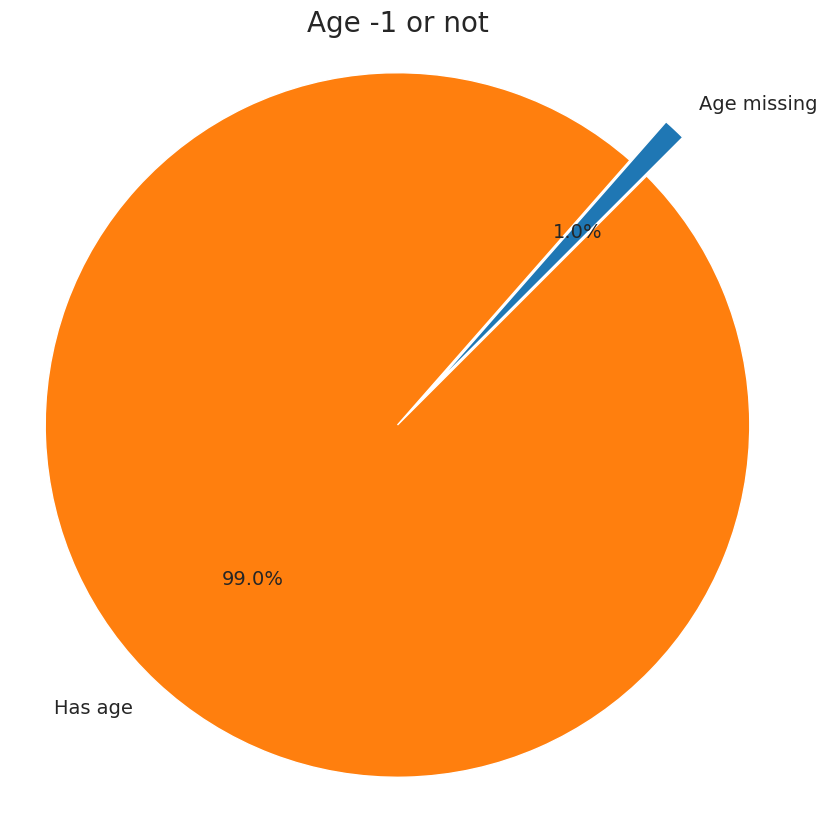

In [15]:
# Create piechart of age being -1 or not
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(
    [len(missing_customers[missing_customers['age'] == -1]), len(missing_customers[missing_customers['age'] != -1])],
    labels=['Age missing', 'Has age'],
    autopct='%1.1f%%',
    startangle=45,
    textprops={'fontsize': 14},
    explode=(0.15, 0),
)
ax.axis('equal')
ax.set_title('Percentage of age feature missing', fontsize=20)
plt.show()

In [6]:
# Get all buying customers before week k
k = all_transactions['week'].max() - 10
buying_customers_before_k = all_transactions[all_transactions['week'] <= k]['customer_id'].unique()

# Get all missing customers before week k
missing_customers_before_k = customers[~customers['customer_id'].isin(buying_customers_before_k)]
missing_customers_before_k

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
49,11587884192535674709,-1,-1,1,0,60,168666
101,9118129194379704777,-1,-1,0,0,32,82940
111,3068174782162411438,-1,-1,0,0,47,168688
117,10891223427188082021,1,1,0,1,25,4728
131,14251714270191885324,-1,-1,0,0,21,168701
...,...,...,...,...,...,...,...
1371791,3960456316385493171,1,1,0,1,21,284627
1371872,18013003278538752235,1,1,0,1,21,22475
1371881,14194722464318609422,-1,-1,0,0,28,45267
1371923,18093647724368995552,-1,-1,0,0,27,153896


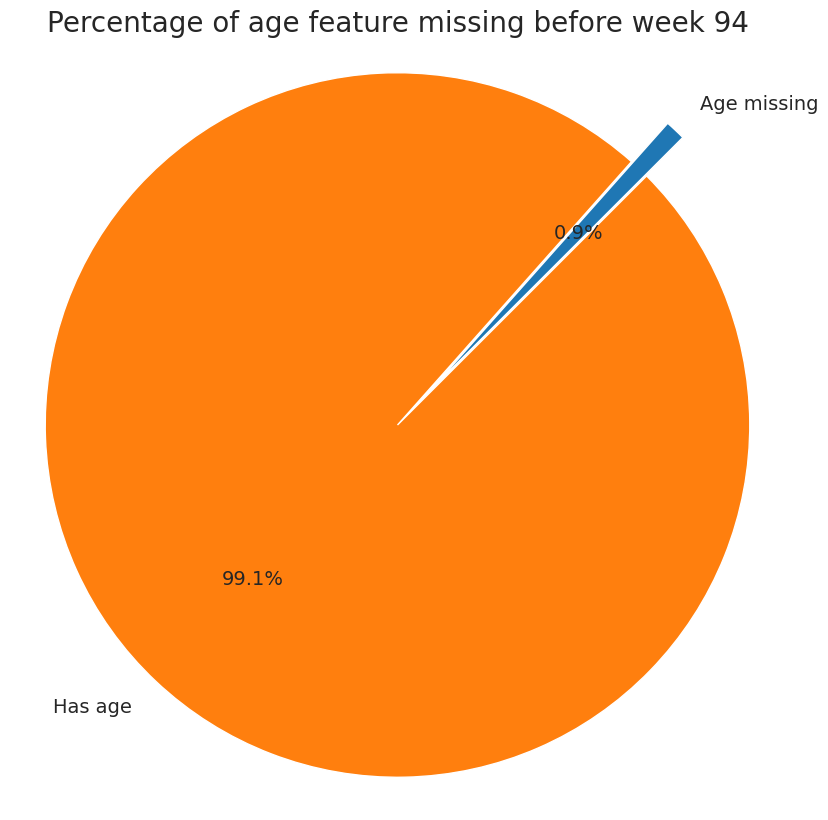

In [17]:
# Create piechart of age being -1 or not
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(
    [len(missing_customers_before_k[missing_customers_before_k['age'] == -1]), len(missing_customers_before_k[missing_customers_before_k['age'] != -1])],
    labels=['Age missing', 'Has age'],
    autopct='%1.1f%%',
    startangle=45,
    textprops={'fontsize': 14},
    explode=(0.15, 0),
)
ax.axis('equal')
ax.set_title('Percentage of age feature missing before week {}'.format(k), fontsize=20)
plt.show()

With this analysis in mind, we can safely use the age feature for generating either candidates or straight-out including it in the features. This will improve the score iff the accuracy-loss of having a missing age is counteracted by the improved precision from having more relevant candidates from age-groups or similar.